# Processo de Coleta

O primeiro passo na instalação de um sistema de RI é obter a coleção de documentos, que pode ser particular ou coletada a partir da Web. No segundo caso, um módulo coletor é responsável pela obtenção dos documentos. A coleção de documentos é armazenada em um disco geralmente chamado de repositório central. Os documentos no repositório central precisam
ser indexados para que a recuperação e o ranqueamento sejam efetuados rapidamente.

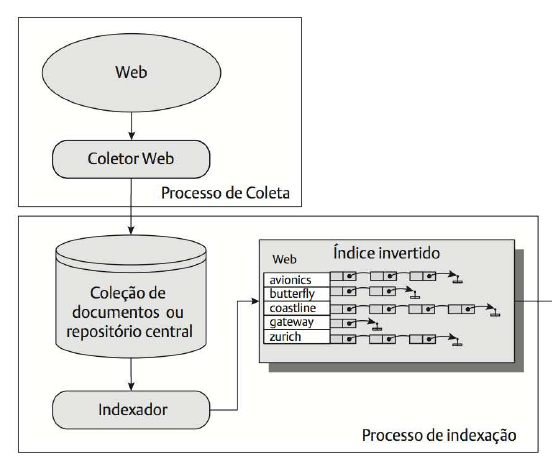

## Coletor de Documentos

Tem a principal tarefa de obter, armazenar e transformar  os dados de diferentes fontes

## Coletor Texto

Download e leitura simples de arquivo de texto

Pré-requisito:
> módulo `requests`

Ações:
1.   Download Documento: https://www.dropbox.com/s/vf7zothf2nnbgqh/covid19.txt?dl=1
2.   Leitura de arquivo modo texto


In [ ]:
import requests

url = "https://www.dropbox.com/s/vf7zothf2nnbgqh/covid19.txt?dl=1"

def download(url, nome):
  resposta = requests.get(url)
  if resposta.status_code==200:
    with open(nome,"wb") as f:
      f.write(resposta.content)

arquivo_nome = "covid19.txt"
download(url, arquivo_nome)

In [ ]:
with open(arquivo_nome,"r") as f:
  texto = f.read()
  
print(texto)

COVID-19 (do inglês Coronavirus Disease 2019) é uma doença infeciosa causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2).[9][10] Os sintomas mais comuns são febre, tosse seca e cansaço.[1][2] Entre outros sintomas menos comuns estão dores musculares, dor de garganta, dor de cabeça, congestão nasal, conjuntivite, perda do olfato e do paladar, erupções cutâneas na pele ou dedos de tom azul.[1][2] Cerca de 80% dos casos confirmados são ligeiros ou assintomáticos e a maioria recupera sem sequelas.[2][8] No entanto, 15% são infeções graves que necessitam de oxigénio e 5% são infeções muito graves que necessitam de ventilação assistida em ambiente hospitalar.[8] Os casos mais graves podem evoluir para pneumonia grave com insuficiência respiratória grave, septicémia, falência de vários órgãos e morte.[2][11] Entre os sinais de agravamento da doença estão a falta de ar, dor ou pressão no peito ou perturbações na fala e no movimento.[11] O agravamento pode ser súbito, o

## Coletor PDF

Download e leitura simples de arquivo PDF

Pré-requisito:
> módulo `pdfminer.six`

Ações:
1.   Download Documento: https://www.dropbox.com/s/j3l886rn6j9eca6/covid19.pdf?dl=1
2.   Converter pdf para modo texto
3.   Salvar de arquivo modo texto



In [ ]:
#Instalar módulo pdfminer.six
!pip install pdfminer.six -q

In [ ]:
url = "https://www.dropbox.com/s/j3l886rn6j9eca6/covid19.pdf?dl=1"

download(url,arquivo_nome+".pdf")


In [ ]:
from pdfminer.high_level import extract_text

pdf_text = extract_text(arquivo_nome+".pdf")

with open(arquivo_nome+".txt","w") as f:
  f.write(pdf_text)

In [ ]:
with open(arquivo_nome+".txt","r") as f:
  txt = f.read()

txt

'COVID-19\n\nOrigem: Wikipédia, a enciclopédia livre.\n\nCOVID-19  (do  inglês  Coronavirus  Disease\n2019)  é  uma  doença  infeciosa  causada  pelo\ncoronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2).[9][10]  Os  sintomas  mais  comuns\nsão  febre,  tosse  seca  e  cansaço.[1][2]  Entre  outros  sintomas\xa0 menos  comuns  estão  dores  musculares,\ndor de garganta, dor de cabeça, congestão nasal, conjuntivite, perda do olfato e do paladar, erupções\ncutâneas  na  pele  ou  dedos  de  tom  azul.[1][2]  Cerca  de  80%  dos  casos  confirmados  são  ligeiros  ou\nassintomáticos  e  a  maioria  recupera  sem  sequelas.[2][8]  No  entanto,  15%  são  infeções  graves  que\nnecessitam  de  oxigénio  e  5%  são  infeções  muito  graves  que  necessitam  de  ventilação  assistida  em\nambiente hospitalar.[8] Os casos mais graves podem evoluir para pneumonia grave com insuficiência\nrespiratória grave, septicémia, falência de vários órgãos e morte.[2][11] Entre os sinais de agra

## Coletor Web

### BeautifulSoup

Documentação: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

Beautiful Soup é uma biblioteca Python para extrair dados de arquivos HTML e XML. É possível analisar, navegar, pesquisar e modificar na árvore de itens.

Download e leitura simples da página web

Pré-requisito:
> módulo `requests`

> módulo `beautifulsoup4`

Ações:
1.   Obter página http://quotes.toscrape.com
2.   Web Scrapping
3.   Salvar o resultado



In [ ]:
import requests 
from bs4 import BeautifulSoup 

url = "http://quotes.toscrape.com/"

resposta = requests.get(url)

soup = BeautifulSoup(resposta.content, "html.parser")

Realizar parser do html para obter o texto. Utilizar `CSS Selector` para identidicar padrões nas tags no html.

O inspecionar do Browser ajudar F12 ou usar alguma extensão, por exemplo do [clique aqui](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb)




In [ ]:
quotes_html = soup.select(".quote")

quotes = []
for item in quotes_html:
  doc = {
      'text': item.select_one(".text").text,
      'author': item.select_one(".author").text,
  }
  quotes.append(doc)

quotes

[{'author': 'Albert Einstein',
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'},
 {'author': 'J.K. Rowling',
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”'},
 {'author': 'Albert Einstein',
  'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'},
 {'author': 'Jane Austen',
  'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”'},
 {'author': 'Marilyn Monroe',
  'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"},
 {'author': 'Albert Einstein',
  'text': '“Try not to become a man of success. Rather become a man of value.”'},
 {'author': 'André Gide',
  'text': '“It is better to be hated for what you are than to be loved for what you are not.”

In [ ]:
import json

with open("quotes.json","w") as f:
  f.write(json.dumps(quotes))

In [ ]:
import pandas as pd

pandajs = pd.read_json("quotes.json")
pandajs.head()


,text,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


### Scrapy



![Scrapy](https://scrapy.org/img/scrapylogo.png)

https://docs.scrapy.org/en/latest/index.html

Scrapy é um framework de web-crawling gratuito e código aberto desenvolvido em Python. Originalmente idealizado para web scraping, também pode ser utilizado para extração de dados usando APIs ou como web crawler de forma mais abrangente.

A arquitetura do Scrapy é construída em torno de "spiders", que são crawlers autônomos que recebem um conjunto de instruções. Seguindo o exemplo de outros don't repeat yourself frameworks, como Django, torna mais fácil construir e evoluir projetos de larga escala que utilizam o crawling, pois permite a reutilização de código. 


Crawler em páginas web

Pré-requisito:
> módulo `scrapy`

> módulo `json`

Ações:
1.   Definir Pipeline http://quotes.toscrape.com
2.   Definir Spider
3.   Executar processo
4.   Ler os dados


In [ ]:
#Instalar Scrapy
!pip install scrapy -q

     |████████████████████████████████| 245kB 4.0MB/s 
     |████████████████████████████████| 235kB 7.1MB/s 
     |████████████████████████████████| 3.1MB 9.5MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 2.7MB 40.6MB/s 
     |████████████████████████████████| 3.2MB 43.4MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 


In [ ]:
#Pipeline

import json

class QuotesPipeline(object):

    def open_spider(self, spider):
        self.file = open('quotes.json', 'w')

    def process_item(self, item, spider):
        line = json.dumps(item) + "\n"
        self.file.write(line)
        return item

    def close_spider(self, spider):
        self.file.close()
    

In [ ]:
#Definir Spider
import scrapy

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://quotes.toscrape.com/',
    ]

    custom_settings = {        
        'ITEM_PIPELINES': {'__main__.QuotesPipeline': 1},
    }
    
    def parse(self, response):
        for quote in response.css('.quote'):
            yield {
                'text': quote.css('.text::text').extract_first(),
                'author': quote.css('.author::text').extract_first(),
                'tags': quote.css('div.tags a.tag::text').extract(),
            }

        next_page = response.css('li.next a::attr(href)').get()
        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)
    

In [ ]:
import scrapy
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()


In [ ]:
import pandas as pd
dfjson = pd.read_json('quotes.json', lines=True)
dfjson.head()


,text,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"


## Coletor Log

### Logstash

![texto alternativo](https://static-www.elastic.co/v3/assets/bltefdd0b53724fa2ce/bltfb3eae3c1d365f00/5ea8c90f6b62d4563b6ecec8/brand-logstash-220x130.svg)

https://www.elastic.co/guide/en/logstash/current/index.html

Ferramenta para coleta, processamento e entrega de dados de
fontes variadas para locais diversos, para que possam ser armazenados e analisados de maneira centralizada e unificada.

Pré-requisito:
> Java

Ações (plugins):

1.   Input (File, Github, Http, twitter, S3, Websocket...)
2.   Filter (Grok, Multiline, Cipher, Json...)
3.   Output (Elasticsearch, File, MongoDB, Email...)

Etapas:

1.   Download  https://www.elastic.co/pt/downloads/logstash
2.   Descompactar e executar:

```
./logstash -f "<caminho para o arquivo>/meupipeline.conf"
```

Modelo do arquivo meupipeline.conf
```
# This is a comment. You should use comments to describe
# parts of your configuration.
input {
  ...
}

filter {
  ...
}

output {
  ...
}
```



In [ ]:
ELK

## Atividade 1: Coleta de Documentos em PDF

Atividade: Baixar arquivos PDFs da Web e armazená-los como arquivo de texto.

Site: 2019 - Anais do IV Congresso sobre Tecnologias na Educação (https://sol.sbc.org.br/index.php/ctrle)
